In [1]:
import pandas as pd
# from sklearn.linear_model import Ridge
from reservoirpy.nodes import Reservoir,Ridge
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the separated input data from CSV files
input_genres_tags_data = pd.read_csv('../data/train/input_genres_tags_data.csv')
input_instruments_tags_data = pd.read_csv('../data/train/input_instruments_tags_data.csv')
input_moods_tags_data = pd.read_csv('../data/train/input_moods_tags_data.csv')

genres_categories_data = pd.read_csv('../data/train/genres_categories_data.csv')
instruments_categories_data = pd.read_csv('../data/train/instruments_categories_data.csv')
moods_categories_data = pd.read_csv('../data/train/moods_categories_data.csv')

# Load the separated output data from CSV files
output_genres_tags_data = pd.read_csv('../data/train/output_genres_tags_data.csv')
output_instruments_tags_data = pd.read_csv('../data/train/output_instruments_tags_data.csv')
output_moods_tags_data = pd.read_csv('../data/train/output_moods_tags_data.csv')

In [3]:
# Print the first few rows of each class to verify
print("Input Genres Tags Data:")
print(input_genres_tags_data.head())

print("\nInput Instruments Tags Data:")
print(input_instruments_tags_data.head())

print("\nInput Moods Tags Data:")
print(input_moods_tags_data.head())

print("\nGenres Categories Data:")
print(genres_categories_data.head())

print("\nInstruments Categories Data:")
print(instruments_categories_data.head())

print("\nMoods Categories Data:")
print(moods_categories_data.head())

print("\nOutput Genres Tags Data:")
print(output_genres_tags_data.head())

print("\nOutput Instruments Tags Data:")
print(output_instruments_tags_data.head())

print("\nOutput Moods Tags Data:")
print(output_moods_tags_data.head())

Input Genres Tags Data:
   ChallengeID  acid-jazz  alternative-rock  americana  blaxpoitation  \
0            0   0.000023          0.006455   0.001339       0.000159   
1            1   0.000069          0.056431   0.008977       0.000347   
2            2   0.000039          0.017784   0.001067       0.000290   
3            3   0.000047          0.004563   0.000289       0.000520   
4            4   0.000022          0.006412   0.001309       0.000204   

   bluegrass  blues-rock  bossa-nova  breakbeat  chill-out  ...    techno  \
0   0.000045    0.000191    0.000087   0.014584   0.007135  ...  0.013838   
1   0.000536    0.001447    0.000093   0.047316   0.019435  ...  0.003960   
2   0.000021    0.001512    0.000033   0.109496   0.008511  ...  0.031038   
3   0.000013    0.000264    0.000026   0.265472   0.004216  ...  0.085144   
4   0.000025    0.001302    0.000039   0.008771   0.001732  ...  0.016197   

   traditional-folk    trance      trap  trip-hop  uptown-soul  vintage-ja

In [4]:
# Split the data into training and testing sets

# Split genres tags data
X_genres_train, X_genres_test, y_genres_train, y_genres_test = train_test_split(
    input_genres_tags_data, output_genres_tags_data, test_size=0.2, random_state=42
)

# Split instruments tags data
X_instruments_train, X_instruments_test, y_instruments_train, y_instruments_test = train_test_split(
    input_instruments_tags_data, output_instruments_tags_data, test_size=0.2, random_state=42
)

# Split moods tags data
X_moods_train, X_moods_test, y_moods_train, y_moods_test = train_test_split(
    input_moods_tags_data, output_moods_tags_data, test_size=0.2, random_state=42
)

# Optionally, you can print the shapes to verify
print(f"Genres training data shape: {X_genres_train.shape}, {y_genres_train.shape}")
print(f"Genres testing data shape: {X_genres_test.shape}, {y_genres_test.shape}")

print(f"Instruments training data shape: {X_instruments_train.shape}, {y_instruments_train.shape}")
print(f"Instruments testing data shape: {X_instruments_test.shape}, {y_instruments_test.shape}")

print(f"Moods training data shape: {X_moods_train.shape}, {y_moods_train.shape}")
print(f"Moods testing data shape: {X_moods_test.shape}, {y_moods_test.shape}")



Genres training data shape: (88683, 91), (88683, 91)
Genres testing data shape: (22171, 91), (22171, 91)
Instruments training data shape: (88683, 113), (88683, 113)
Instruments testing data shape: (22171, 113), (22171, 113)
Moods training data shape: (88683, 47), (88683, 47)
Moods testing data shape: (22171, 47), (22171, 47)


In [5]:
# Prepare the data for training
X_genres_train = X_genres_train.drop(columns=['ChallengeID'])
X_instruments_train= X_instruments_train.drop(columns=['ChallengeID'])
X_moods_train= X_moods_train.drop(columns=['ChallengeID'])
y_genres_train = y_genres_train.drop(columns=['ChallengeID'])
y_instruments_train = y_instruments_train.drop(columns=['ChallengeID'])
y_moods_train = y_moods_train.drop(columns=['ChallengeID'])

X_genres_test = X_genres_test.drop(columns=['ChallengeID'])
X_instruments_test = X_instruments_test.drop(columns=['ChallengeID'])
X_moods_test = X_moods_test.drop(columns=['ChallengeID'])
y_genres_test = y_genres_test.drop(columns=['ChallengeID'])
y_instruments_test = y_instruments_test.drop(columns=['ChallengeID'])
y_moods_test = y_moods_test.drop(columns=['ChallengeID'])

In [6]:
# Define the reservoir and readout models
reservoir_Genre = Reservoir(
    units=50,  # Number of neurons
    sr=0,     # Spectral radius of the weight matrix
    lr=1,    # Leak rate
    input_scaling=1.  # Input scaling factor
)

readout_Genre = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
model_Genre = reservoir_Genre >> readout_Genre

reservoir_Instrument = Reservoir(
    units=50,  # Number of neurons
    sr=0,     # Spectral radius of the weight matrix
    lr=1,    # Leak rate
)
readout_Instrument = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
model_Instrument = reservoir_Instrument >> readout_Instrument

reservoir_Mood = Reservoir(
    units=50,  # Number of neurons
    sr=0,     # Spectral radius of the weight matrix
    lr=1,    # Leak rate
)
readout_Mood = Ridge(ridge=1e-4)  # Regularization: penalizes overfitting
model_Mood = reservoir_Mood >> readout_Mood

In [7]:
# Ensure the input data is in the correct format
X_genres_train_reshaped = X_genres_train[0:3000].values.reshape(-1, 1, X_genres_train.shape[1])
X_instruments_train_reshaped = X_instruments_train.values.reshape(-1, 1, X_instruments_train.shape[1])
X_moods_train_reshaped = X_moods_train.values.reshape(-1, 1, X_moods_train.shape[1])

y_genres_train_reshaped = y_genres_train.values.reshape(-1, 1, y_genres_train.shape[1])
y_instruments_train_reshaped = y_instruments_train.values.reshape(-1, 1, y_instruments_train.shape[1])
y_moods_train_reshaped = y_moods_train.values.reshape(-1, 1, y_moods_train.shape[1])

# Shape of the input data
print(f"Genres training data shape: {X_genres_train.shape}, {y_genres_train.shape}")
print(f"Instruments training data shape: {X_instruments_train.shape}, {y_instruments_train.shape}")
print(f"Moods training data shape: {X_moods_train.shape}, {y_moods_train.shape}")
# Shape of the reshape data
print(f"Genres training data reshape: {X_genres_train_reshaped.shape}, {y_genres_train_reshaped.shape}")
print(f"Instruments training data reshape: {X_instruments_train_reshaped.shape}, {y_instruments_train_reshaped.shape}")
print(f"Moods training data reshape: {X_moods_train_reshaped.shape}, {y_moods_train_reshaped.shape}")


Genres training data shape: (88683, 90), (88683, 90)
Instruments training data shape: (88683, 112), (88683, 112)
Moods training data shape: (88683, 46), (88683, 46)
Genres training data reshape: (3000, 1, 90), (88683, 1, 90)
Instruments training data reshape: (88683, 1, 112), (88683, 1, 112)
Moods training data reshape: (88683, 1, 46), (88683, 1, 46)


In [8]:
# Train the models with one line for single timestep
model_Genre.fit(X_genres_train_reshaped, y_genres_train_reshaped)
# model_Instrument.fit(X_instruments_train_reshaped, y_instruments_train_reshaped)
# model_Mood.fit(X_moods_train_reshaped, y_moods_train_reshaped)

print("Models trained successfully.")

Running Model-0: 100%|██████████| 3000/3000 [00:03<00:00, 941.82it/s]


Fitting node Ridge-0...
Models trained successfully.


In [9]:
# Test the models
X_genres_test_reshaped = X_genres_test[0:3000].values.reshape(-1, 1, X_genres_test.shape[1])

X_genres_test_reshaped.shape


(3000, 1, 90)

In [10]:
y_genres_pred = model_Genre.run(X_genres_test_reshaped)

Running Model-0: 100%|██████████| 1/1 [00:00<00:00, 11983.73it/s]


In [ ]:
y_genres_pred

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
len(y_genres_pred)



3000

In [26]:
# Convert the list to a NumPy array
y_genres_pred_array = np.array(y_genres_pred)

# Reshape the array to 2-dimensional
y_genres_pred_reshaped = y_genres_pred_array.reshape(3000, 90)

# Convert the reshaped array to a DataFrame
y_genres_pred_df = pd.DataFrame(y_genres_pred_reshaped)

# Save the DataFrame to a CSV file
y_genres_pred_df.to_csv('../data/train/y_genres_pred.csv', index=False)

# Display the DataFrame
print(y_genres_pred_df)

            0         1         2         3         4         5         6   \
0     0.006522 -0.042375 -0.016490  0.013146 -0.003264 -0.009721 -0.013575   
1     0.002262  0.104874 -0.004383  0.005211  0.000995 -0.014339  0.012019   
2     0.009471 -0.009573 -0.027279  0.000902 -0.001523 -0.013987  0.001998   
3    -0.000304 -0.051326  0.001030  0.008727  0.015303  0.007140  0.014415   
4    -0.009962 -0.092363 -0.006743  0.002704 -0.007389  0.012278 -0.030416   
...        ...       ...       ...       ...       ...       ...       ...   
2995 -0.001888 -0.016688 -0.002772  0.000677 -0.006283  0.008504 -0.001922   
2996  0.020062  0.128083  0.029645  0.027403  0.014155  0.018621  0.019948   
2997  0.006705  0.001197  0.012141 -0.000439 -0.000303 -0.011557  0.003648   
2998 -0.039217 -0.027347  0.012288  0.029054  0.014928 -0.015838 -0.003191   
2999 -0.002863  0.006359  0.034377  0.003374 -0.007080  0.048084 -0.001778   

            7         8         9   ...        80        81    

ValueError: x and y can be no greater than 2D, but have shapes (100,) and (100, 1, 90)

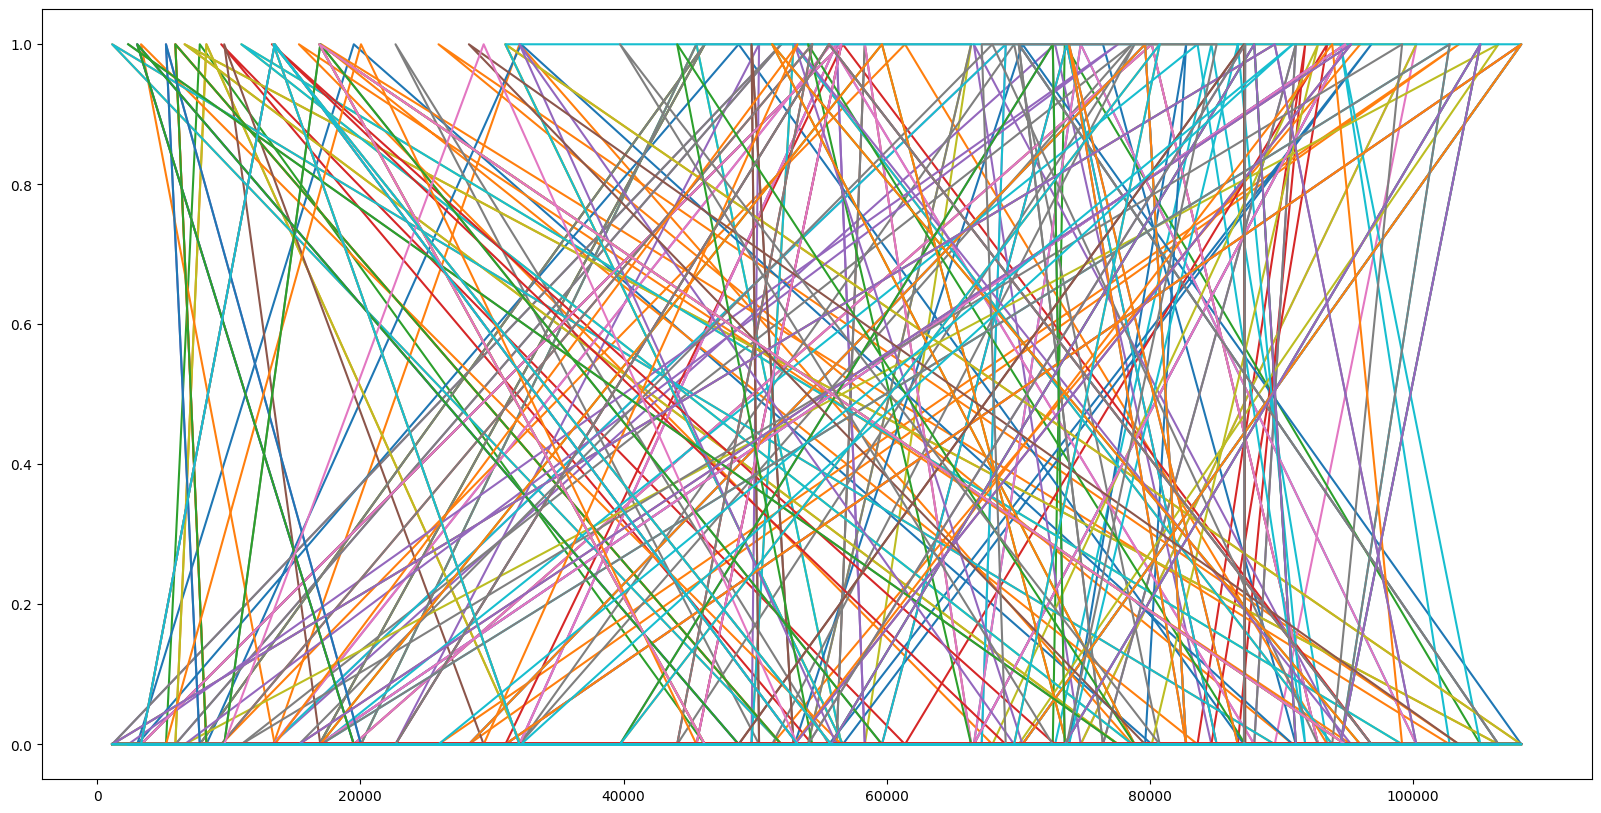

In [20]:
# Visualize the predictions over the training data
plt.figure(figsize=(20, 10))
plt.plot(y_genres_train[:100], label="True")
plt.plot(y_genres_pred[:100], label="Predicted")
plt.legend()
plt.show()